# **Práctica 2 - Puntuación Crediticia**
## 1. Toma de Contacto y filtrado de datos
Importamos el csv que hemos subido al github personal de uno de los integrantes del equipo:

In [6]:
import pandas as pd

money_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/train.csv", sep=",")
money_dataframe

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,43161,3985,4,Lawrencez,40.0,856431180.0,Accountant,97384.44,8167.370000,1.0,...,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,40663,49494,2,Mohammedr,39.0,417453942.0,Writer,31369.58,2607.131667,8.0,...,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,111059,2925,6,Alistairn,17.0,499528888.0,Writer,30171.86,2772.321667,6.0,...,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,72139,21358,2,Dinesh Naire,22.0,859449371.0,Doctor,13100.02,1246.668333,7.0,...,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard
4,119841,21221,4,Bakerg,26.0,485239890.0,Doctor,62313.54,5120.795000,6.0,...,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,42636,39869,7,Hendrik Sackmannb,50.0,217529489.0,Media_Manager,107761.29,9047.107500,4.0,...,Standard,34.09,41.899992,211.0,Yes,0.000000,150.220682,High_spent_Large_value_payments,984.123010,Standard
79996,114031,38305,2,Alexj,33.0,98861902.0,Scientist,16218.32,1098.526667,6.0,...,Bad,4466.33,24.275710,98.0,NM,64.533114,34.457893,High_spent_Small_value_payments,260.523798,Poor
79997,85991,9976,6,Luciana Lopezi,25.0,745835485.0,Engineer,29374.77,2377.897500,3.0,...,Standard,1189.37,38.439021,241.0,NM,40.264074,22.234178,High_spent_Medium_value_payments,403.980355,Standard
79998,21240,13193,7,Edward Krudyd,15.0,894419091.0,Manager,43782.45,3543.537500,6.0,...,Bad,3468.25,24.233841,85.0,Yes,240.664739,42.839562,Low_spent_Large_value_payments,146.741586,Poor


Para hacernos a la idea de la repercusión de cada dato con el valor objetivo, hemos creado algunos histogramas. Hemos eliminado el ID, Customer_ID, Name, SSN, Occupation y Type_of_Loan por poseer valores muy diversos y dispares entre sí. Por otro lado, hemos estimado que el valor del mes en el que se actualizó la información parece no tener ninguna relación con la clasificación deseada, por lo cual se ha eliminado directamente también. Finalmente, obviamente la columna con los valores objetivo ha sido eliminada de la representación:

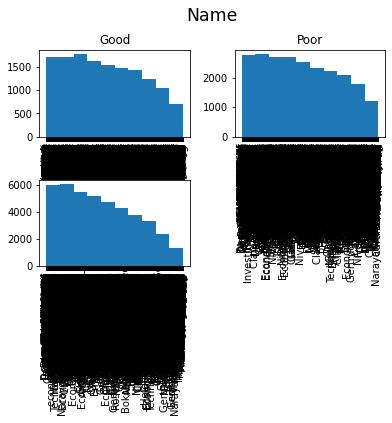

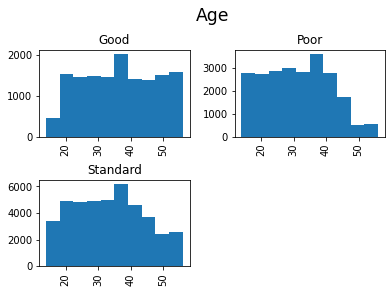

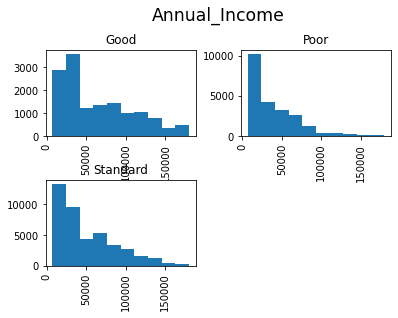

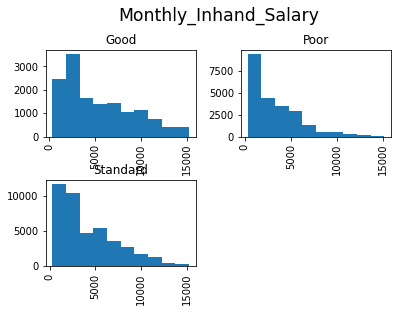

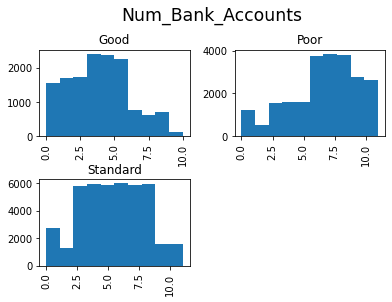

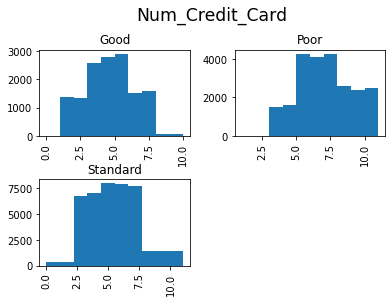

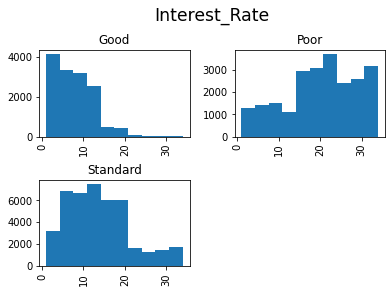

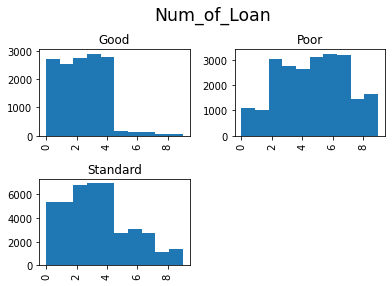

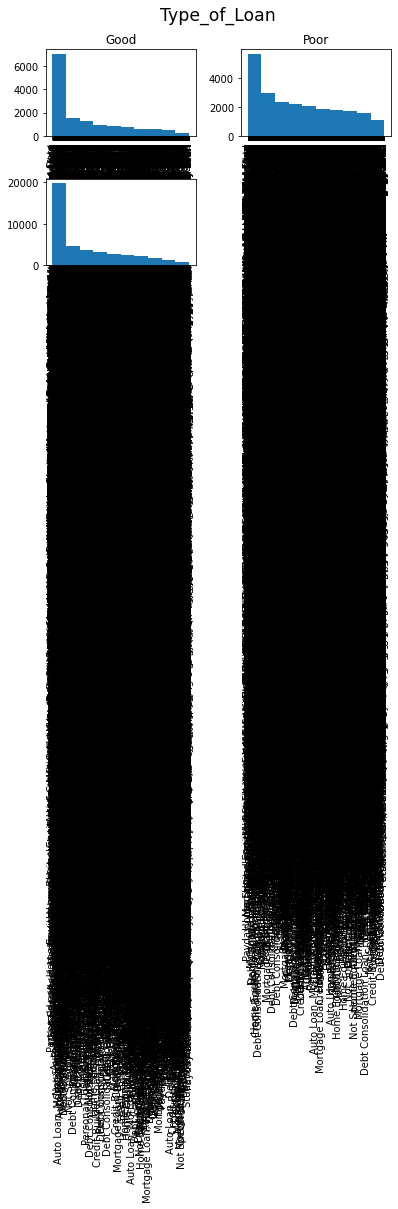

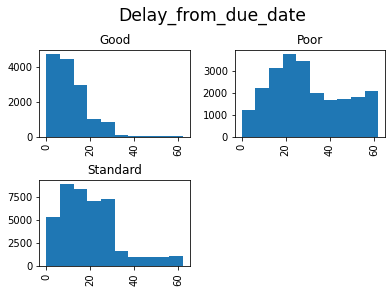

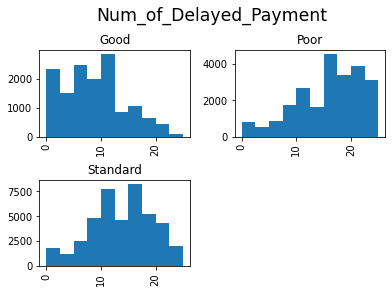

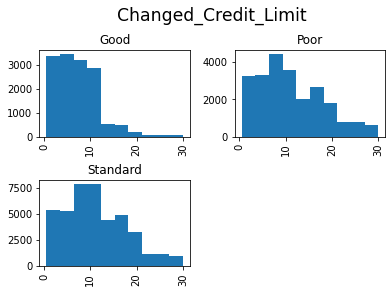

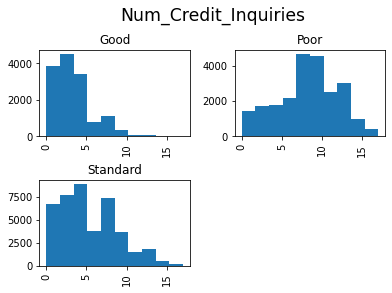

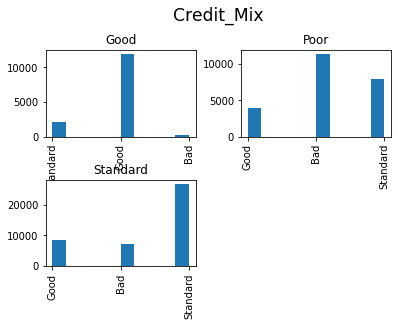

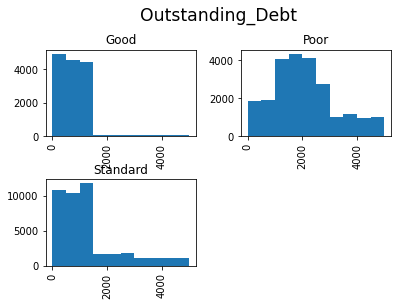

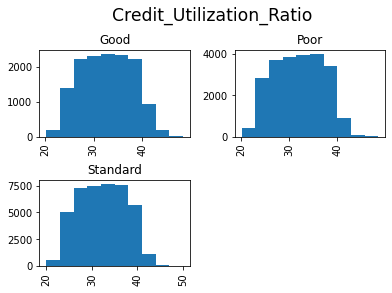

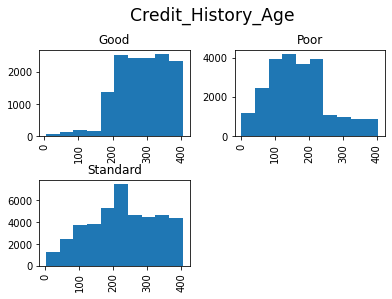

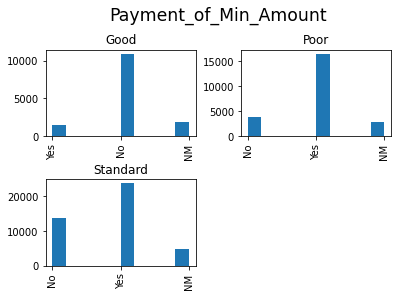

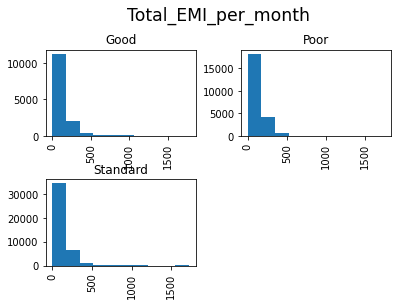

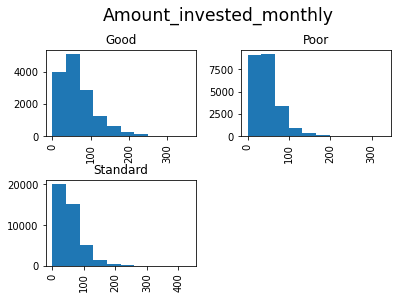

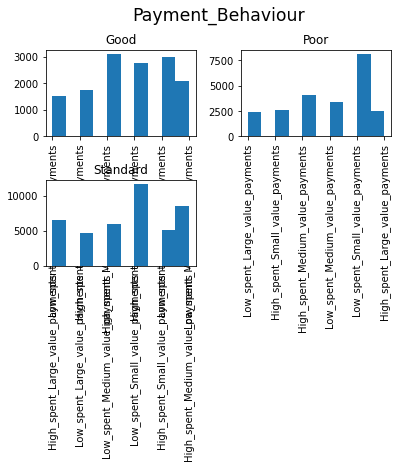

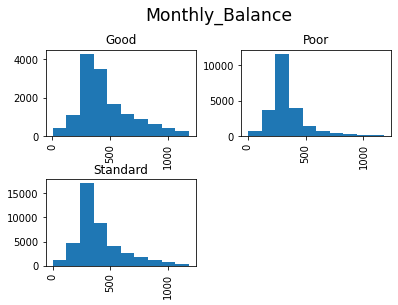

In [52]:
import matplotlib.pyplot as plt

for column in money_dataframe.columns:
  if (column in ["ID", "Customer_ID", "Name", "Month", "SSN", "Occupation", "Type_of_Loan", "Credit_Score"]):
    continue
  money_dataframe.hist(column, "Credit_Score")
  plt.suptitle(column, x=0.5, y=1.05, ha='center', fontsize='xx-large')

Habiendo estudiado los histogramas para conocer qué tipo de transformación realizar en cada caso, procedemos a crear las funciones que lleven a cabo las transformaciones pertinentes. Usamos StandarScaler para aquellos valores que tienen una distribución que no podemos determinar concretamente; RobustScaler para aquellos que podemos observar algún outlier en las representaciones; OrdinalEncoder para aquellos datos que observamos unos datos con etiquetas o labels que pueden ser ordenadas de peor a mejor o de menor peso a mayor; por último, aquellos datos que parecen poseer una distribución gaussiana o gaussiana desplazada en el eje X, usamos PowerTransformer:

In [7]:
import numpy as np
import sklearn.compose

def transformer_whole_data(money_dataframe):
  np_money = np.array(money_dataframe)
  column_transformer = sklearn.compose.ColumnTransformer(transformers=[
      ("ID", "drop", [0]),
      ("Customer_ID", "drop", [1]),
      ("Month", "drop", [2]),
      ("Name", "drop", [3]),
      ("Age", sklearn.preprocessing.PowerTransformer(), [4]),
      ("SSN", "drop", [5]),
      ("Occupation", "drop", [6]),
      ("Annual_Income", sklearn.preprocessing.StandardScaler(), [7]),
      ("Monthly_Inhand_Salary", sklearn.preprocessing.StandardScaler(), [8]),
      ("Num_Bank_Accounts", sklearn.preprocessing.PowerTransformer(), [9]),
      ("Num_Credit_Card", sklearn.preprocessing.PowerTransformer(), [10]),
      ("Interest_Rate", sklearn.preprocessing.RobustScaler(), [11]),
      ("Num_of_Loan", sklearn.preprocessing.PowerTransformer(), [12]),
      ("Type_of_Loan", "drop", [13]),
      ("Delay_from_due_date", sklearn.preprocessing.PowerTransformer(), [14]),
      ("Num_of_Delayed_Payment", sklearn.preprocessing.PowerTransformer(), [15]),
      ("Changed_Credit_Limit", sklearn.preprocessing.RobustScaler(), [16]),
      ("Num_Credit_Inquiries", sklearn.preprocessing.PowerTransformer(), [17]),
      ("Credit_Mix", sklearn.preprocessing.OrdinalEncoder(categories=[['Bad', 'Standard', 'Good']]), [18]),
      ("Outstanding_Debt", sklearn.preprocessing.RobustScaler(), [19]),
      ("Credit_Utilization_Ratio", sklearn.preprocessing.PowerTransformer(), [20]),
      ("Credit_History_Age", sklearn.preprocessing.StandardScaler(), [21]),
      ("Payment_of_Min_Amount", sklearn.preprocessing.OrdinalEncoder(categories=[['Yes', 'No', 'NM']]), [22]),
      ("Total_EMI_per_month", sklearn.preprocessing.StandardScaler(), [23]),
      ("Amount_invested_monthly", sklearn.preprocessing.StandardScaler(), [24]),
      ("Payment_Behaviour", sklearn.preprocessing.OrdinalEncoder(categories=[['Low_spent_Large_value_payments', 'High_spent_Small_value_payments', 
                                                                              'High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 
                                                                              'Low_spent_Small_value_payments', 'High_spent_Large_value_payments']]), [25]),
      ("Monthly_Balance", sklearn.preprocessing.PowerTransformer(), [26]),
      ("Credit_Score", sklearn.preprocessing.OrdinalEncoder(categories=[['Poor', 'Standard', 'Good']]), [27])
  ]);
  return column_transformer.fit_transform(np_money)

def transformer_whole_test(money_dataframe):
  np_money = np.array(money_dataframe)
  column_transformer = sklearn.compose.ColumnTransformer(transformers=[
      ("ID", "drop", [0]),
      ("Customer_ID", "drop", [1]),
      ("Month", "drop", [2]),
      ("Name", "drop", [3]),
      ("Age", sklearn.preprocessing.StandardScaler(), [4]),
      ("SSN", "drop", [5]),
      ("Occupation", "drop", [6]),
      ("Annual_Income", sklearn.preprocessing.StandardScaler(), [7]),
      ("Monthly_Inhand_Salary", sklearn.preprocessing.PowerTransformer(), [8]),
      ("Num_Bank_Accounts", sklearn.preprocessing.StandardScaler(), [9]),
      ("Num_Credit_Card", sklearn.preprocessing.StandardScaler(), [10]),
      ("Interest_Rate", sklearn.preprocessing.RobustScaler(), [11]),
      ("Num_of_Loan", sklearn.preprocessing.StandardScaler(), [12]),
      ("Type_of_Loan", "drop", [13]),
      ("Delay_from_due_date", sklearn.preprocessing.PowerTransformer(), [14]),
      ("Num_of_Delayed_Payment", sklearn.preprocessing.PowerTransformer(), [15]),
      ("Changed_Credit_Limit", sklearn.preprocessing.RobustScaler(), [16]),
      ("Num_Credit_Inquiries", sklearn.preprocessing.PowerTransformer(), [17]),
      ("Credit_Mix", sklearn.preprocessing.OrdinalEncoder(categories=[['Bad', 'Standard', 'Good']]), [18]),
      ("Outstanding_Debt", sklearn.preprocessing.PowerTransformer(), [19]),
      ("Credit_Utilization_Ratio", sklearn.preprocessing.PowerTransformer(), [20]),
      ("Credit_History_Age", sklearn.preprocessing.StandardScaler(), [21]),
      ("Payment_of_Min_Amount", sklearn.preprocessing.OrdinalEncoder(categories=[['Yes', 'No', 'NM']]), [22]),
      ("Total_EMI_per_month", sklearn.preprocessing.StandardScaler(), [23]),
      ("Amount_invested_monthly", sklearn.preprocessing.StandardScaler(), [24]),
      ("Payment_Behaviour", sklearn.preprocessing.OrdinalEncoder(categories=[['Low_spent_Large_value_payments', 'High_spent_Small_value_payments', 
                                                                              'High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 
                                                                              'Low_spent_Small_value_payments', 'High_spent_Large_value_payments']]), [25]),
      ("Monthly_Balance", sklearn.preprocessing.PowerTransformer(), [26])
  ]);
  return column_transformer.fit_transform(np_money)

Después de realizar la transformación para todo el dataset (sabemos que esto producirá un overfitting, pero primero queremos probar el modelo de datos y luego refinaremos esto, aunque en parte se paliará por el modelo de clasificación que tomemos). Usamos iloc para separar el dataset entre data y target. Conociendo que tenemos 19 columnas, tomamos de la 0 a la 17 (incluidas, entonces 18 columnas) como data y la última restante como target:

In [8]:
money_transformed = transformer_whole_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

Comenzamos empleando el modelo Random Forest con 100 como número de estimadores, posteriormente pensaremos qué otros parámentros variamos y cómo los ajustamos:

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier()

Cargamos la información de test y realizamos la predicción:

In [10]:
test_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/test.csv", sep=",")
ids = test_dataframe.iloc[:,0]

test_dataframe = transformer_whole_test(test_dataframe)

y_pred = rfc.predict(test_dataframe)

In [11]:
def translate_prediction(y_pred):
  credit_score_dict = {0: 'Poor', 1: 'Standard', 2: 'Good'}
  prediction_translated = []
  for i in range(len(y_pred)):
    prediction_translated.append(credit_score_dict[y_pred[i]])
  return prediction_translated

Traducimos los valores del target al valor correspondiente como string, puesto que tuvimos que establecerlos como números para la realización de la clasificación. Por último, creamos la primera entrega base:

In [12]:
prediction_dataframe = pd.DataFrame(y_pred)

prediction_translated = translate_prediction(y_pred)
d = {'ID': ids.tolist(), 'Credit_Score': prediction_translated}
submit = pd.DataFrame(data=d)
submit.to_csv("Prac2_random_forest_all.csv", index=False)

Una vez hecha la clasificación con el Random Forest, vamos a ver la importancia de cada valor a la hora de la realización de la clasificación. Representaremos los resultados mediante un gráfico de barras para poder observarlo de una forma más visual:

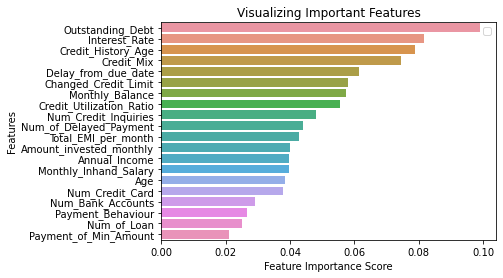

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

columns = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date",  "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Credit_Mix", "Outstanding_Debt", "Credit_Utilization_Ratio", "Credit_History_Age", "Payment_of_Min_Amount", "Total_EMI_per_month", "Amount_invested_monthly", "Payment_Behaviour",  "Monthly_Balance"]
feature_imp = pd.Series(rfc.feature_importances_,index=columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## 2. Prueba de la Clasificación con datos filtrados
Vemos que no son muy útiles las columnas Num_Bank_Accounts, Payment_Behaviour, Num_of_Loan, Payment_of_Min_Amount. Entonces creamos unos nuevos transformadores y las eliminamos:

In [13]:
import numpy as np
import sklearn.compose

def transformer_filtered_data(money_dataframe):
  np_money = np.array(money_dataframe)
  column_transformer = sklearn.compose.ColumnTransformer(transformers=[
      ("ID", "drop", [0]),
      ("Customer_ID", "drop", [1]),
      ("Month", "drop", [2]),
      ("Name", "drop", [3]),
      ("Age", sklearn.preprocessing.PowerTransformer(), [4]),
      ("SSN", "drop", [5]),
      ("Occupation", "drop", [6]),
      ("Annual_Income", sklearn.preprocessing.StandardScaler(), [7]),
      ("Monthly_Inhand_Salary", sklearn.preprocessing.StandardScaler(), [8]),
      ("Num_Bank_Accounts", "drop", [9]),
      ("Num_Credit_Card", sklearn.preprocessing.PowerTransformer(), [10]),
      ("Interest_Rate", sklearn.preprocessing.RobustScaler(), [11]),
      ("Num_of_Loan", "drop", [12]),
      ("Type_of_Loan", "drop", [13]),
      ("Delay_from_due_date", sklearn.preprocessing.PowerTransformer(), [14]),
      ("Num_of_Delayed_Payment", sklearn.preprocessing.PowerTransformer(), [15]),
      ("Changed_Credit_Limit", sklearn.preprocessing.RobustScaler(), [16]),
      ("Num_Credit_Inquiries", sklearn.preprocessing.PowerTransformer(), [17]),
      ("Credit_Mix", sklearn.preprocessing.OrdinalEncoder(categories=[['Bad', 'Standard', 'Good']]), [18]),
      ("Outstanding_Debt", sklearn.preprocessing.RobustScaler(), [19]),
      ("Credit_Utilization_Ratio", sklearn.preprocessing.PowerTransformer(), [20]),
      ("Credit_History_Age", sklearn.preprocessing.StandardScaler(), [21]),
      ("Payment_of_Min_Amount", "drop", [22]),
      ("Total_EMI_per_month", sklearn.preprocessing.StandardScaler(), [23]),
      ("Amount_invested_monthly", sklearn.preprocessing.StandardScaler(), [24]),
      ("Payment_Behaviour", "drop", [25]),
      ("Monthly_Balance", sklearn.preprocessing.PowerTransformer(), [26]),
      ("Credit_Score", sklearn.preprocessing.OrdinalEncoder(categories=[['Poor', 'Standard', 'Good']]), [27])
  ]);
  return column_transformer.fit_transform(np_money)

def transformer_filtered_test(money_dataframe):
  np_money = np.array(money_dataframe)
  column_transformer = sklearn.compose.ColumnTransformer(transformers=[
      ("ID", "drop", [0]),
      ("Customer_ID", "drop", [1]),
      ("Month", "drop", [2]),
      ("Name", "drop", [3]),
      ("Age", sklearn.preprocessing.StandardScaler(), [4]),
      ("SSN", "drop", [5]),
      ("Occupation", "drop", [6]),
      ("Annual_Income", sklearn.preprocessing.StandardScaler(), [7]),
      ("Monthly_Inhand_Salary", sklearn.preprocessing.PowerTransformer(), [8]),
      ("Num_Bank_Accounts", "drop", [9]),
      ("Num_Credit_Card", sklearn.preprocessing.StandardScaler(), [10]),
      ("Interest_Rate", sklearn.preprocessing.RobustScaler(), [11]),
      ("Num_of_Loan", "drop", [12]),
      ("Type_of_Loan", "drop", [13]),
      ("Delay_from_due_date", sklearn.preprocessing.PowerTransformer(), [14]),
      ("Num_of_Delayed_Payment", sklearn.preprocessing.PowerTransformer(), [15]),
      ("Changed_Credit_Limit", sklearn.preprocessing.RobustScaler(), [16]),
      ("Num_Credit_Inquiries", sklearn.preprocessing.PowerTransformer(), [17]),
      ("Credit_Mix", sklearn.preprocessing.OrdinalEncoder(categories=[['Bad', 'Standard', 'Good']]), [18]),
      ("Outstanding_Debt", sklearn.preprocessing.PowerTransformer(), [19]),
      ("Credit_Utilization_Ratio", sklearn.preprocessing.PowerTransformer(), [20]),
      ("Credit_History_Age", sklearn.preprocessing.StandardScaler(), [21]),
      ("Payment_of_Min_Amount", "drop", [22]),
      ("Total_EMI_per_month", sklearn.preprocessing.StandardScaler(), [23]),
      ("Amount_invested_monthly", sklearn.preprocessing.StandardScaler(), [24]),
      ("Payment_Behaviour", "drop", [25]),
      ("Monthly_Balance", sklearn.preprocessing.PowerTransformer(), [26])
  ]);
  return column_transformer.fit_transform(np_money)

Repetimos el proceso que ya habíamos realizado con los datos sin filtrar (esta vez ponemos todo el código en una celda, pues es muy similar a lo visto anteriormente):

In [14]:
# Transformación y separación entre data y target
money_transformed = transformer_filtered_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

# Creación del Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X, y)

# Toma de datos y creación de la predicción
test_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/test.csv", sep=",")
ids = test_dataframe.iloc[:,0]

test_dataframe = transformer_filtered_test(test_dataframe)

y_pred = rfc.predict(test_dataframe)

prediction_dataframe = pd.DataFrame(y_pred)

# Traducción y escritura de los datos para la posterior entrega
prediction_translated = translate_prediction(y_pred)
d = {'ID': ids.tolist(), 'Credit_Score': prediction_translated}
submit = pd.DataFrame(data=d)
submit.to_csv("Prac2_random_forest_filtered.csv", index=False)# Transformación y separación entre data y target
money_transformed = transformer_filtered_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

# Creación del Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X, y)

# Toma de datos y creación de la predicción
test_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/test.csv", sep=",")
ids = test_dataframe.iloc[:,0]

test_dataframe = transformer_filtered_test(test_dataframe)

y_pred = rfc.predict(test_dataframe)

prediction_dataframe = pd.DataFrame(y_pred)

# Traducción y escritura de los datos para la posterior entrega
prediction_translated = translate_prediction(y_pred)
d = {'ID': ids.tolist(), 'Credit_Score': prediction_translated}
submit = pd.DataFrame(data=d)
submit.to_csv("Prac2_random_forest_filtered.csv", index=False)# Transformación y separación entre data y target
money_transformed = transformer_filtered_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

# Creación del Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X, y)

# Toma de datos y creación de la predicción
test_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/test.csv", sep=",")
ids = test_dataframe.iloc[:,0]

test_dataframe = transformer_filtered_test(test_dataframe)

y_pred = rfc.predict(test_dataframe)

prediction_dataframe = pd.DataFrame(y_pred)

# Traducción y escritura de los datos para la posterior entrega
prediction_translated = translate_prediction(y_pred)
d = {'ID': ids.tolist(), 'Credit_Score': prediction_translated}
submit = pd.DataFrame(data=d)
submit.to_csv("Prac2_random_forest_filtered.csv", index=False)# Transformación y separación entre data y target
money_transformed = transformer_filtered_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

# Creación del Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X, y)

# Toma de datos y creación de la predicción
test_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/test.csv", sep=",")
ids = test_dataframe.iloc[:,0]

test_dataframe = transformer_filtered_test(test_dataframe)

y_pred = rfc.predict(test_dataframe)

prediction_dataframe = pd.DataFrame(y_pred)

# Traducción y escritura de los datos para la posterior entrega
prediction_translated = translate_prediction(y_pred)
d = {'ID': ids.tolist(), 'Credit_Score': prediction_translated}
submit = pd.DataFrame(data=d)
submit.to_csv("Prac2_random_forest_filtered.csv", index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


## 3. Prueba del modelo comprobando su eficiencia mediante Validación Justa
Primero, como siempre, transformamos los datos y separamos en data y target:

In [22]:
money_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/train.csv", sep=",")

money_transformed = transformer_filtered_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

Luego, dividimos el conjunto de entrenamiento en 70% para el entrenamiento y luego un 30% para valorar la precisión de este entrenamiento. Como semilla de aleatoriedad comenzamos con el 16, por probar un número cualquiera que nos gusta:

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

Tras realizar la división, entrenamos el clasificador y luego predecimos la clasificación:

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Conocemos la precisión de la predicción gracias al accuracy_score del módulo metrics:

In [25]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.8052916666666666

Para comparar, vamos a ver qué accuracy obtenemos si realizamos la misma división de datos (70-30 y 16 como semilla) y usamos todas las features antes de filtrar:

In [21]:
money_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/train.csv", sep=",")

# Transformación y separación entre data y target
money_transformed = transformer_whole_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

# División del conjunto de datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# Entrenamiento
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

# Cálculo de precisión
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.80775

Según podemos ver por la precisión, casi que obtenemos mejores resultados sin filtrar aquellos datos que supuestamente no aportaban tanto al modelo. Aún así vamos a ver qué semilla para cada conjunto transformado nos da la precisión más elevada:

*   Para los datos filtrados:




In [27]:
money_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/train.csv", sep=",")

# Transformación y separación entre data y target
money_transformed = transformer_filtered_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

best_accuracy = 0

for seed in range(100):
  # División del conjunto de datos
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

  # Entrenamiento
  rfc = RandomForestClassifier(n_estimators=100)

  rfc.fit(X_train,y_train)

  y_pred = rfc.predict(X_test)

  # Cálculo de precisión
  accuracy = metrics.accuracy_score(y_test, y_pred)
  if accuracy > best_accuracy:
    best_seed = seed
    best_accuracy = accuracy

print("Accuracy: ", best_accuracy, " Seed: ", best_seed)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed whe

Accuracy:  0.8075833333333333  Seed:  18


Tras casi 45 minutos de ejecución, obtenemos la precisión máxima con la semilla 18 y un valor de accuracy de 0.8075833333333333. Con estos valores probamos a realizar una submission:

In [30]:
money_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/train.csv", sep=",")

# Transformación y separación entre data y target
money_transformed = transformer_filtered_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

# División del conjunto de datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

# Entrenamiento
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

# Toma de datos y creación de la predicción
test_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/test.csv", sep=",")
ids = test_dataframe.iloc[:,0]

test_dataframe = transformer_filtered_test(test_dataframe)

y_pred = rfc.predict(test_dataframe)

prediction_dataframe = pd.DataFrame(y_pred)

# Traducción y escritura de los datos para la posterior entrega
prediction_translated = translate_prediction(y_pred)
d = {'ID': ids.tolist(), 'Credit_Score': prediction_translated}
submit = pd.DataFrame(data=d)
submit.to_csv("Prac2_random_forest_seed18.csv", index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [ ]:
money_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/train.csv", sep=",")

# Transformación y separación entre data y target
money_transformed = transformer_whole_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

best_accuracy = 0

for seed in range(100):
  # División del conjunto de datos
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

  # Entrenamiento
  rfc = RandomForestClassifier(n_estimators=100)

  rfc.fit(X_train,y_train)

  y_pred = rfc.predict(X_test)

  # Cálculo de precisión
  accuracy = metrics.accuracy_score(y_test, y_pred)
  if accuracy > best_accuracy:
    best_seed = seed
    best_accuracy = accuracy

print("Accuracy: ", best_accuracy, " Seed: ", best_seed)

## 4. Prueba del modelo mediante validación cruzada
Finalmente, mediante la validación cruzada vamos a tratar de obtener predicciones sin overfitting y que puedan darnos mejores resultados. Contamos con funciones como cross_val_score que nos dan la precisión de cada k-fold, pero nosotrxs no queremos conocer sólo la precisión de estos folds, sino que deseamos obtener la mejor de las predicciones de dicho fold. Por lo cual, vamos a usar cross_val_predict, que nos devuelve directamente la predicción con mayor accuracy:

In [35]:
from sklearn.model_selection import cross_val_predict

money_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/train.csv", sep=",")

# Transformación y separación entre data y target
money_transformed = transformer_filtered_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

# Creación del Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

y_pred = cross_val_predict(rfc, X, y, cv=6)

# Toma de datos y creación de la predicción
test_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/test.csv", sep=",")
ids = test_dataframe.iloc[:,0]

test_dataframe = transformer_filtered_test(test_dataframe)

y_pred = rfc.predict(test_dataframe)

prediction_dataframe = pd.DataFrame(y_pred)

# Traducción y escritura de los datos para la posterior entrega
prediction_translated = translate_prediction(y_pred)
d = {'ID': ids.tolist(), 'Credit_Score': prediction_translated}
submit = pd.DataFrame(data=d)
submit.to_csv("Prac2_random_forest_filtered.csv", index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed whe

NotFittedError: ignored

## 5. Anexo. Primer intento infructuoso
Inicialmente, como la palabra dice, comenzamos por el principio. Entonces tratamos de abordar el problema con una Regresión Logística, sin muy buenos resultados. Después determinamos tratar de aplicar un clasificador más potente y ver si nuestras predicciones mejoraban, dicho clasificador es el Random Forest del que hemos hablado más arriba. Aquí aportamos un ejemplo de nuestro primer intento:

In [34]:
from sklearn.linear_model import LogisticRegression

money_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/train.csv", sep=",")

# Transformación y separación entre data y target
money_transformed = transformer_filtered_data(money_dataframe)

X = money_transformed[:, :-1]
y = money_transformed[:,-1:]

lr = LogisticRegression(random_state=0).fit(X, y)

test_dataframe = pd.read_csv("https://raw.githubusercontent.com/rubengr16/MachineLearning/main/Prac2/test.csv", sep=",")
ids = test_dataframe.iloc[:,0]

test_dataframe = transformer_filtered_test(test_dataframe)

y_pred = lr.predict(test_dataframe)

prediction_dataframe = pd.DataFrame(y_pred)

# Traducción y escritura de los datos para la posterior entrega
prediction_translated = translate_prediction(y_pred)
d = {'ID': ids.tolist(), 'Credit_Score': prediction_translated}
submit = pd.DataFrame(data=d)
submit.to_csv("Prac2_logistic_regresion.csv", index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 6. Bibliografía
* Cuadernos de la Asignatura de Machine Learning de R. Lara y F. Ortega
* [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
* [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)
* [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)
* [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
* [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict)
* [Understanding Random Forests Classifiers in Python Tutorial](https://www.datacamp.com/tutorial/random-forests-classifier-python)
* [Pandas histogram Labels and Title](https://stackoverflow.com/questions/32685185/pandas-histogram-labels-and-title)